In [ ]:
import requests

# GitHub raw URL
url = "https://github.com/elitelaksh7/InstagramDataAnalysis/raw/main/InstagramDataset.zip"

# Download the file
response = requests.get(url)

# Save it locally
with open("InstagramDataset.zip", "wb") as f:
    f.write(response.content)

print("Download complete.")


Download complete.


In [ ]:
import zipfile

with zipfile.ZipFile("/content/InstagramDataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")  # or just '.' to extract to current directory


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df = pd.read_csv('/content/Instagram data.csv', encoding='ISO-8859-1')


In [ ]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [ ]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


In [ ]:
#note the col value we get uis a string so do df[col]to access the column
for col in df.columns:
    print(col,df[col].dtypes)

Impressions int64
From Home int64
From Hashtags int64
From Explore int64
From Other int64
Saves int64
Comments int64
Shares int64
Likes int64
Profile Visits int64
Follows int64
Caption object
Hashtags object


In [ ]:
# Engagement Metrics
df['Engagement'] = df['Likes'] + df['Comments'] + df['Shares'] + df['Saves']
df['Engagement Rate'] = df['Engagement'] / df['Impressions']

# Reach Sources Total
df['Reach Total'] = df['From Home'] + df['From Hashtags'] + df['From Explore'] + df['From Other']

# Caption & Hashtag Insights
df['Caption Length'] = df['Caption'].astype(str).apply(len)
df['Hashtag Count'] = df['Hashtags'].astype(str).apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)


In [ ]:
from transformers import PegasusTokenizer, PegasusForConditionalGeneration

model_name = "google/pegasus-xsum"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

In [ ]:
# 4. Prepare your input texts from the DataFrame
# Combine Caption and Hashtags into a single input text per row
texts = [
    str(caption) + " " + str(hashtags).replace("#", "")
    for caption, hashtags in zip(df['Caption'], df['Hashtags'])
]


In [ ]:
# 5. Batch process (recommended: batch size ~8-16 for CPU)
batch_size = 8
generated_titles = []

for i in range(0, len(texts), batch_size):
    batch_texts = texts[i:i+batch_size]

    inputs = tokenizer(batch_texts, truncation=True, padding='longest', return_tensors='pt')
    outputs = model.generate(
        inputs['input_ids'],
        max_length=15,
        num_beams=4,
        early_stopping=True
    )
    decoded = [tokenizer.decode(o, skip_special_tokens=True) for o in outputs]
    generated_titles.extend(decoded)


In [ ]:
# 6. Store back to DataFrame
df['Title'] = generated_titles


In [ ]:
print(df['Title'].value_counts())


Title
All images are copyrighted.                                                 8
Python is one of the most popular programming languages in the world.       5
If you want to learn more about data science, there are a                   4
Some of the best data science project ideas on healthcare                   3
Here is a list of the best books to learn Time Series Analysis              2
                                                                           ..
Python is a popular programming language for data science, and there are    1
How to calculate mean, median and mode using Python?                        1
All projects are copyrighted.                                               1
Some of the best Machine Learning project ideas on Clustering               1
In this course you will learn how to do clustering analysis of music        1
Name: count, Length: 81, dtype: int64


In [ ]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement', 'Engagement Rate',
       'Reach Total', 'Caption Length', 'Hashtag Count', 'Title'],
      dtype='object')

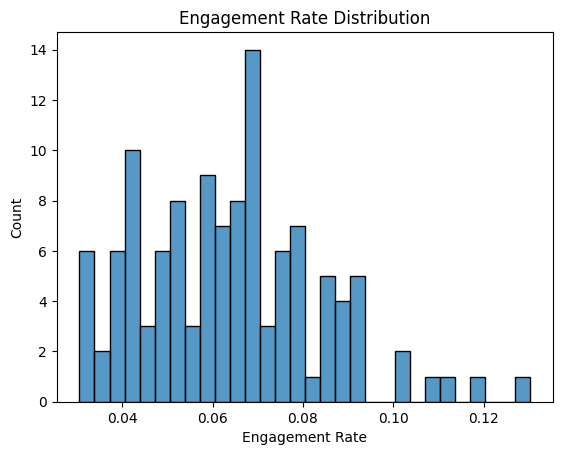

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Engagement Rate Distribution

#this allows to group similar posts based on engagement rate and then later predict the
#engagement rate of the input post

sns.histplot(df['Engagement Rate'], bins=30)
plt.title("Engagement Rate Distribution")
plt.show()

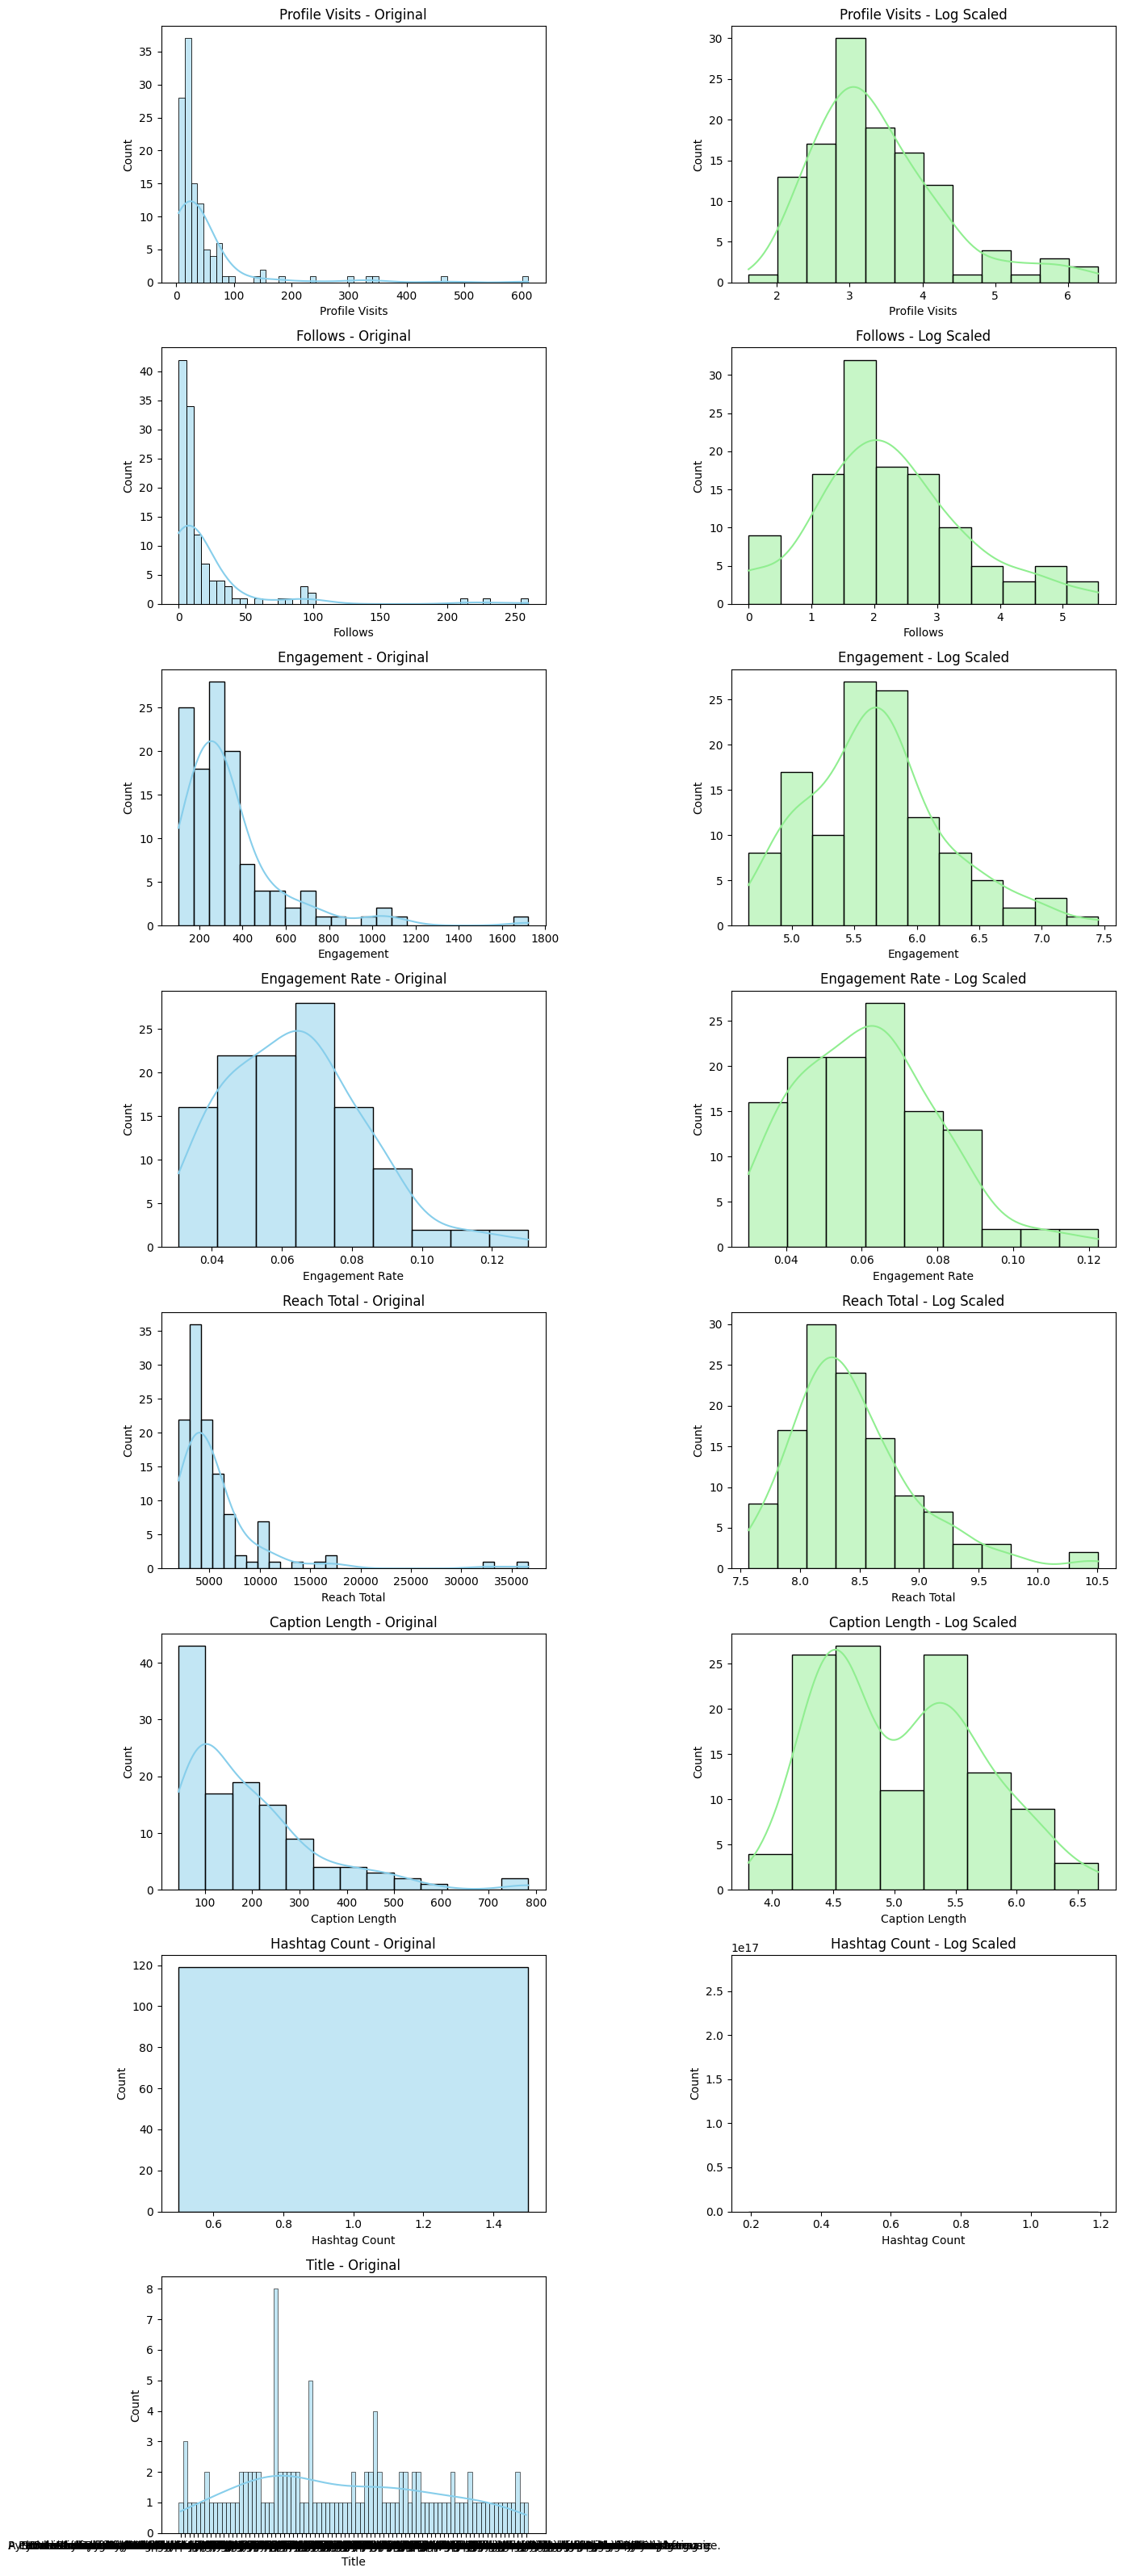

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of columns to analyze
cols = ['Profile Visits','Follows','Engagement','Engagement Rate','Reach Total', 'Caption Length', 'Hashtag Count','Title']

# Set up subplots: 2 rows per feature (original + log), total columns count
rows = len(cols)
fig, axes = plt.subplots(rows, 2, figsize=(14, 4 * rows))

for i, col in enumerate(cols):
    # Original distribution
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"{col} - Original")

    # Check if column is numeric before log transforming
    if np.issubdtype(df[col].dtype, np.number):
        sns.histplot(np.log1p(df[col]), kde=True, ax=axes[i, 1], color='lightgreen')
        axes[i, 1].set_title(f"{col} - Log Scaled")
    else:
        axes[i, 1].set_visible(False)  # Hide second plot for non-numeric columns

plt.tight_layout()
plt.show()


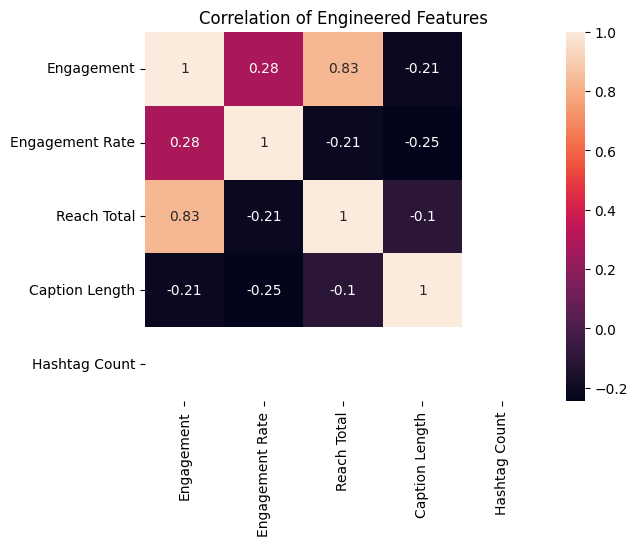

In [ ]:
sns.heatmap(df[['Engagement', 'Engagement Rate', 'Reach Total', 'Caption Length', 'Hashtag Count']].corr(), annot=True)
plt.title("Correlation of Engineered Features")
plt.show()


Text(0.5, 1.0, 'Impressions vs Engagement')

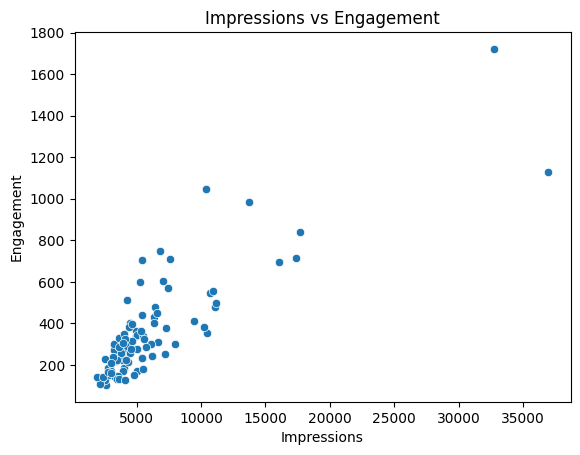

In [ ]:
sns.scatterplot(data=df, x='Impressions', y='Engagement')
plt.title("Impressions vs Engagement")


In [ ]:
df['Performance Label'] = pd.qcut(df['Engagement Rate'], q=3, labels=['Low', 'Medium', 'High'])


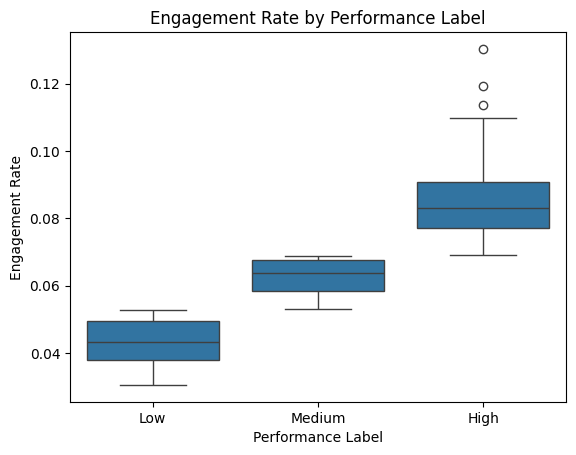

In [ ]:
sns.boxplot(x='Performance Label', y='Engagement Rate', data=df)
plt.title('Engagement Rate by Performance Label')
plt.show()


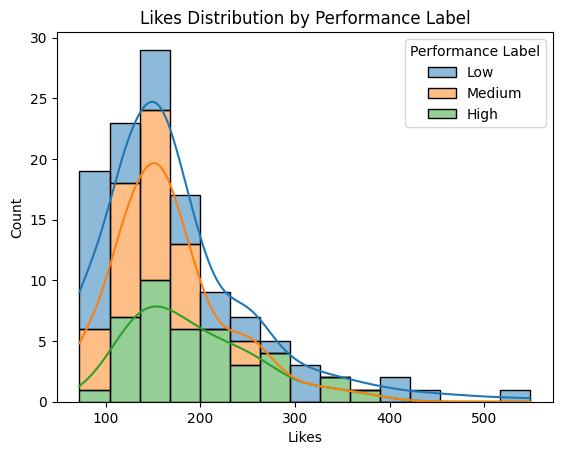

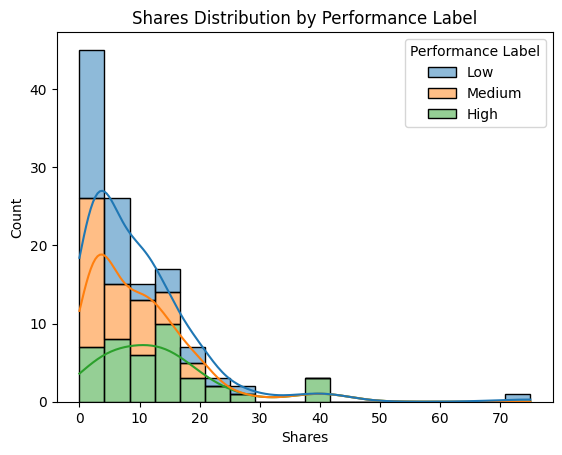

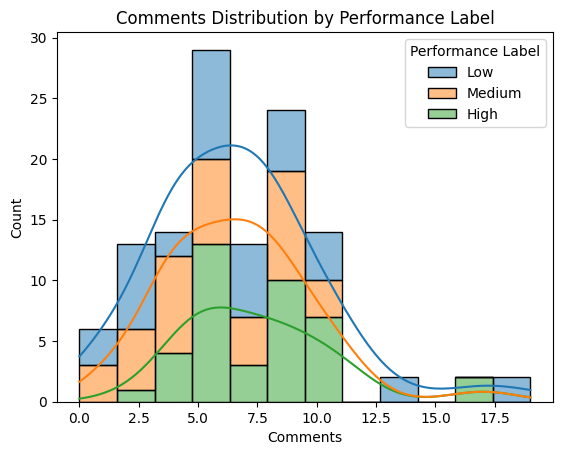

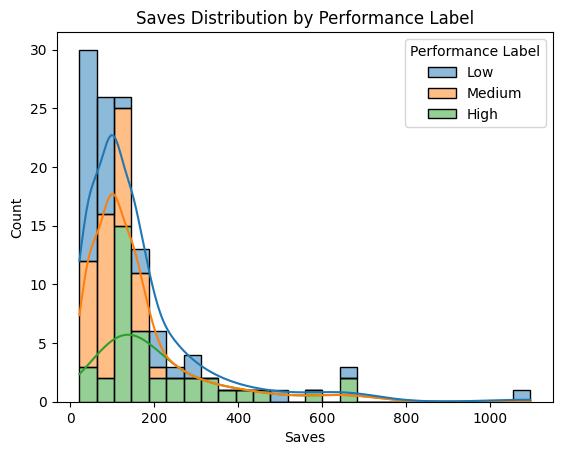

In [ ]:
metrics = ['Likes', 'Shares', 'Comments', 'Saves']
for col in metrics:
    sns.histplot(df, x=col, hue='Performance Label', kde=True, multiple='stack')
    plt.title(f'{col} Distribution by Performance Label')
    plt.show()


In [ ]:
df.groupby('Performance Label')[['Caption Length', 'Hashtag Count', 'Impressions']].mean()


<ipython-input-31-7f692b436ee6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Performance Label')[['Caption Length', 'Hashtag Count', 'Impressions']].mean()


,Caption Length,Hashtag Count,Impressions
Performance Label,,,
Low,236.350000,1.0,8117.05000
Medium,183.282051,1.0,4034.74359
High,157.525000,1.0,4918.45000


In [ ]:
df.groupby('Title')[['Likes', 'Follows', 'Saves']].mean().sort_values('Likes', ascending=False)


,Likes,Follows,Saves
Title,,,
"If you want to become a data science professional, there are a",461.00,147.0,834.00
Python is one of the most popular programming languages in the world and,330.00,146.0,192.00
"If you want to work in data science, there are a number",308.00,96.0,504.00
Researchers at the University of Bristol are using python to learn how to,294.00,42.0,100.00
"If you want to learn more about data science, there are a",273.75,25.0,494.75
...,...,...,...
A neural network is a computer program that learns new information about a,82.00,2.0,49.00
"In this talk, I will show you how to use python to",81.00,4.0,28.00
"In this article, I will show you how to use boxplot",76.00,0.0,49.00


In [ ]:
!pip install -q yake


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.9/356.9 kB 8.4 MB/s eta 0:00:00


              precision    recall  f1-score   support

        High       1.00      0.78      0.88         9
         Low       0.80      1.00      0.89         8
      Medium       0.86      0.86      0.86         7

    accuracy                           0.88        24
   macro avg       0.89      0.88      0.87        24
weighted avg       0.89      0.88      0.87        24



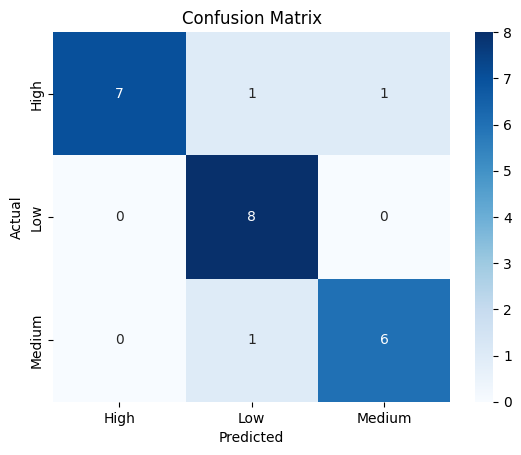

The predicted performance for the post is: Low


In [ ]:
# --- PART 1: DATA PREP & FEATURE ENGINEERING ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy.sparse import hstack, csr_matrix
from transformers import PegasusTokenizer, PegasusForConditionalGeneration

# ---- Text Vectorization ----
vectorizer = TfidfVectorizer(max_features=100)
text_features = vectorizer.fit_transform(df['Title'])

# ---- Numeric Features ----
features = ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other',
            'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows',
            'Engagement', 'Engagement Rate', 'Reach Total', 'Caption Length', 'Hashtag Count']

scaler = StandardScaler()
X_numeric = scaler.fit_transform(df[features])

# ---- Combine Numeric + Text Features ----
X_combined = hstack([csr_matrix(X_numeric), text_features])
df['Performance Label'] = pd.qcut(df['Engagement Rate'], q=3, labels=['Low', 'Medium', 'High'])
y = df['Performance Label']

# ---- Train-Test Split & Model Training ----
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

model_clf = RandomForestClassifier(n_estimators=100, random_state=42)
model_clf.fit(X_train, y_train)

# ---- Evaluation ----
y_pred = model_clf.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_clf.classes_, yticklabels=model_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# --- PART 2: PREDICTION FUNCTION ---
def predict_post_performance(post_dict):
    # --- Auto-generate Title from Caption using model ---
    caption_text = post_dict.get('Caption', '')
    inputs = tokenizer([caption_text], truncation=True, padding='longest', return_tensors='pt')
    summary_ids = model.generate(inputs['input_ids'], max_length=15, num_beams=4, early_stopping=True)
    generated_title = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Vectorize the title
    text_vec = vectorizer.transform([generated_title])

    # Feature engineering
    post_dict['Engagement'] = post_dict['Likes'] + post_dict['Comments'] + post_dict['Shares'] + post_dict['Saves']
    post_dict['Engagement Rate'] = post_dict['Engagement'] / post_dict['Impressions']
    post_dict['Reach Total'] = post_dict['From Home'] + post_dict['From Hashtags'] + post_dict['From Explore'] + post_dict['From Other']
    post_dict['Caption Length'] = len(post_dict.get('Caption', ''))
    post_dict['Hashtag Count'] = len(post_dict.get('Hashtags', '').split(','))

    # Prepare input
    input_df = pd.DataFrame([post_dict])
    input_numeric = scaler.transform(input_df[features])
    input_combined = hstack([csr_matrix(input_numeric), text_vec])

    # Predict
    prediction = model_clf.predict(input_combined)[0]
    return prediction

# Example: test with a new post
example_post = {
    'Impressions': 12000,
    'From Home': 7000,
    'From Hashtags': 2000,
    'From Explore': 1000,
    'From Other': 2000,
    'Saves': 300,
    'Comments': 150,
    'Shares': 200,
    'Likes': 2500,
    'Profile Visits': 800,
    'Follows': 90,
    'Caption': 'Here are some of the most important data visualization insights for your business.',
    'Hashtags': '#finance #money #business #investing #investments'
}

predicted_performance = predict_post_performance(example_post)
print(f"The predicted performance for the post is: {predicted_performance}")


In [ ]:
print(df.columns)


Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement', 'Engagement Rate',
       'Reach Total', 'Caption Length', 'Hashtag Count', 'Title',
       'Performance Label'],
      dtype='object')


In [ ]:
def explain_prediction(post_dict):
    # Generate prediction
    performance_label = predict_post_performance(post_dict)

    # Feature engineering (same as in prediction function)
    post_dict['Engagement'] = post_dict['Likes'] + post_dict['Comments'] + post_dict['Shares'] + post_dict['Saves']
    post_dict['Engagement Rate'] = post_dict['Engagement'] / post_dict['Impressions']
    post_dict['Reach Total'] = post_dict['From Home'] + post_dict['From Hashtags'] + post_dict['From Explore'] + post_dict['From Other']
    post_dict['Caption Length'] = len(post_dict.get('Caption', ''))
    post_dict['Hashtag Count'] = len(post_dict.get('Hashtags', '').split(','))

    # Sort feature importances from classifier
    importances = model_clf.feature_importances_
    tfidf_feature_names = vectorizer.get_feature_names_out()
    all_feature_names = features + [f"TFIDF_{name}" for name in tfidf_feature_names]

    feature_importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\n📌 Predicted Performance:", performance_label)
    print("\n📊 Post Feature Values:")
    for key in features:
        print(f"{key}: {post_dict.get(key)}")

    print("\n🔥 Top Influential Features in Model:")
    print(feature_importance_df.head(10).to_string(index=False))

    return performance_label


In [ ]:
high_post = {
    'Impressions': 5000,
    'From Home': 2500,
    'From Hashtags': 1000,
    'From Explore': 1000,
    'From Other': 500,
    'Saves': 500,
    'Comments': 200,
    'Shares': 300,
    'Likes': 2000,
    'Profile Visits': 500,
    'Follows': 150,
    'Caption': 'These marketing hacks boosted our engagement by 10x! 🚀📊',
    'Hashtags': '#growth #marketing #tips #viral #success'
}

medium_post = {
    'Impressions': 8000,
    'From Home': 4000,
    'From Hashtags': 1000,
    'From Explore': 1000,
    'From Other': 2000,
    'Saves': 100,
    'Comments': 50,
    'Shares': 80,
    'Likes': 500,
    'Profile Visits': 300,
    'Follows': 30,
    'Caption': 'Check out our latest update — it’s built for creators! ✨',
    'Hashtags': '#update #news #product #tech'
}

low_post = {
    'Impressions': 10000,
    'From Home': 6000,
    'From Hashtags': 1500,
    'From Explore': 500,
    'From Other': 2000,
    'Saves': 10,
    'Comments': 5,
    'Shares': 2,
    'Likes': 50,
    'Profile Visits': 100,
    'Follows': 5,
    'Caption': 'A small update went live today.',
    'Hashtags': '#update'
}


In [ ]:
for post in [high_post, medium_post, low_post]:
    label = predict_post_performance(post)
    print(f"Predicted Performance: {label}")


Predicted Performance: High
Predicted Performance: Low
Predicted Performance: Low


In [ ]:
print("🔴 LOW PERFORMANCE POST")
explain_prediction(low_post)

print("\n🟡 MEDIUM PERFORMANCE POST")
explain_prediction(medium_post)

print("\n🟢 HIGH PERFORMANCE POST")
explain_prediction(high_post)


🔴 LOW PERFORMANCE POST

📌 Predicted Performance: Low

📊 Post Feature Values:
Impressions: 10000
From Home: 6000
From Hashtags: 1500
From Explore: 500
From Other: 2000
Saves: 10
Comments: 5
Shares: 2
Likes: 50
Profile Visits: 100
Follows: 5
Engagement: 67
Engagement Rate: 0.0067
Reach Total: 10000
Caption Length: 31
Hashtag Count: 1

🔥 Top Influential Features in Model:
        Feature  Importance
Engagement Rate    0.203128
 Profile Visits    0.053065
  From Hashtags    0.040361
      From Home    0.040040
          Saves    0.039814
     Engagement    0.039647
    Impressions    0.037110
          Likes    0.033928
   From Explore    0.033205
    Reach Total    0.030781

🟡 MEDIUM PERFORMANCE POST

📌 Predicted Performance: Low

📊 Post Feature Values:
Impressions: 8000
From Home: 4000
From Hashtags: 1000
From Explore: 1000
From Other: 2000
Saves: 100
Comments: 50
Shares: 80
Likes: 500
Profile Visits: 300
Follows: 30
Engagement: 730
Engagement Rate: 0.09125
Reach Total: 8000
Caption Leng

'High'